In [129]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information form over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 12 years ago. So if today is 2021.02.15 then the weather we want to forecast is for the date 2009.02.16. You are suppsed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to used BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is, to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck at the first part, you can use the replacement data provided in the second part

In [2]:
%%bigquery 
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


Downloading: 100%|██████████| 20/20 [00:02<00:00,  9.85rows/s]


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,39730,99999,1929,10,20,52.799999,4,45.500000,4.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
1,33110,99999,1929,12,18,47.500000,4,44.000000,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
2,37770,99999,1931,4,24,50.200001,4,44.299999,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
3,726810,24131,1931,6,23,65.099998,24,41.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
4,726810,24131,1931,3,2,42.799999,24,31.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
5,726810,24131,1931,9,17,67.000000,24,40.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
6,726810,24131,1931,8,7,68.400002,24,37.200001,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
7,726810,24131,1932,7,14,64.099998,24,54.099998,8.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
8,726810,24131,1932,10,23,41.099998,24,31.000000,8.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
9,726810,24131,1932,1,5,24.600000,24,21.100000,8.0,NaN,...,NaN,None,NaN,NaN,True,True,True,True,True,True


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

In [3]:
# CAUTION, in order to predict snow 12 years ago we need data for 2010 as well, so I just move the time-series window
# to 2005 - 2010
from google.cloud import bigquery

bqclient = bigquery.Client()

query = """
SELECT CAST(CONCAT(year,"-",month,"-",day) AS DATE) AS date, * 
FROM `bigquery-public-data.samples.gsod` 
WHERE year BETWEEN 2006 AND 2010
    AND station_number BETWEEN 725300 AND 726300
"""

data = (bqclient.query(query).result().to_dataframe())


### 2. Task 
From here want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009. 

In [4]:
import pandas as pd
import math

In [5]:
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2006-06-25,725835,99999,2006,6,25,86.000000,4,34.700001,4.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
1,2006-10-16,725835,99999,2006,10,16,47.799999,4,41.900002,4.0,...,NaN,None,0.15,NaN,False,False,False,False,False,False
2,2006-12-04,725409,99999,2006,12,4,19.799999,5,16.200001,5.0,...,NaN,None,NaN,NaN,False,False,False,False,False,False
3,2006-01-18,725869,99999,2006,1,18,35.599998,5,31.299999,5.0,...,NaN,None,0.29,NaN,False,False,False,False,False,False
4,2006-01-06,725868,99999,2006,1,6,18.299999,5,16.500000,5.0,...,NaN,None,0.00,2.0,False,False,False,False,False,False


In [6]:
filtered_data_by_station_number = data[data['station_number'].between(725300,725330)]
filtered_data_by_station_number.reset_index(inplace=True, drop=True)

In [7]:
filtered_data_by_station_number.columns

Index(['date', 'station_number', 'wban_number', 'year', 'month', 'day',
       'mean_temp', 'num_mean_temp_samples', 'mean_dew_point',
       'num_mean_dew_point_samples', 'mean_sealevel_pressure',
       'num_mean_sealevel_pressure_samples', 'mean_station_pressure',
       'num_mean_station_pressure_samples', 'mean_visibility',
       'num_mean_visibility_samples', 'mean_wind_speed',
       'num_mean_wind_speed_samples', 'max_sustained_wind_speed',
       'max_gust_wind_speed', 'max_temperature', 'max_temperature_explicit',
       'min_temperature', 'min_temperature_explicit', 'total_precipitation',
       'snow_depth', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado'],
      dtype='object')

Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate. 

In [8]:
# after a first look at the available data it seems that a lot of fields are present (*._samples) that do not have any 
# valuable information for our use-case (based on the assumption that the fields are correctly labeled)
# same applies to year, month, day and the wban_number which do not have any value for us as well
# this results in a manual feature selection in the following

In [9]:
samples = filtered_data_by_station_number.filter(regex=(".*_samples"))
samples

,num_mean_temp_samples,num_mean_dew_point_samples,num_mean_sealevel_pressure_samples,num_mean_station_pressure_samples,num_mean_visibility_samples,num_mean_wind_speed_samples
0,15,15.0,NaN,NaN,15.0,15.0
1,24,24.0,NaN,NaN,24.0,24.0
2,24,24.0,NaN,NaN,24.0,24.0
3,24,24.0,NaN,NaN,24.0,24.0
4,24,24.0,NaN,NaN,24.0,24.0
...,...,...,...,...,...,...
15557,24,24.0,24.0,NaN,24.0,24.0
15558,24,24.0,24.0,NaN,24.0,24.0
15559,24,24.0,24.0,NaN,24.0,24.0
15560,24,24.0,24.0,NaN,24.0,24.0


In [10]:
def delete_sample_columns(data):
    filtered_data = data.drop(columns=['num_mean_temp_samples', 'num_mean_dew_point_samples', 'num_mean_sealevel_pressure_samples',
                             'num_mean_station_pressure_samples', 'num_mean_visibility_samples', 'num_mean_wind_speed_samples'])
    return filtered_data

def delete_date_columns(data):
    filtered_data = data.drop(columns=['year', 'month', 'day'])
    return filtered_data

def delete_wban_column(data):
    filtered_data = data.drop(columns=['wban_number'])
    return filtered_data

In [11]:
# and recognized that max_temperature_explicit, min_temperature_explicit and min_temperature use boolean as type (max_temperature_explicit)
# or have "none" or NaN values only (min_temperature_explicit, min_temperature), no real information gain as well
def delete_temperature_explicit_columns(data):
    filtered_data = data.drop(columns=['max_temperature_explicit', 'min_temperature_explicit', 'min_temperature'])
    return filtered_data

In [12]:
filtered_data_by_station_number = delete_sample_columns(filtered_data_by_station_number)
filtered_data_by_station_number = delete_date_columns(filtered_data_by_station_number)
filtered_data_by_station_number = delete_wban_column(filtered_data_by_station_number)
filtered_data_by_station_number = delete_temperature_explicit_columns(filtered_data_by_station_number)

# Note: on an intuitive level, snow_depth also makes no sense to keep it, however, lets check
# correlation first

In [13]:
# Now check for nan values:
feature_columns = [x for x in filtered_data_by_station_number.columns.tolist() if x != "snow" and x != "date"]

def check_if_column_has_nan_values(data, column):
    return (column, filtered_data_by_station_number[column].isnull().values.any(), filtered_data_by_station_number[column].isnull().sum())

nan_values = [check_if_column_has_nan_values(filtered_data_by_station_number, x) for x in feature_columns]
nan_values

[('station_number', False, 0),
 ('mean_temp', False, 0),
 ('mean_dew_point', True, 2),
 ('mean_sealevel_pressure', True, 1569),
 ('mean_station_pressure', True, 15276),
 ('mean_visibility', True, 3),
 ('mean_wind_speed', True, 5),
 ('max_sustained_wind_speed', True, 9),
 ('max_gust_wind_speed', True, 5557),
 ('max_temperature', True, 2),
 ('total_precipitation', True, 152),
 ('snow_depth', True, 15059),
 ('fog', False, 0),
 ('rain', False, 0),
 ('hail', False, 0),
 ('thunder', False, 0),
 ('tornado', False, 0)]

In [16]:
# it can be seen that a lot of data is missing some values (snow_depth, mean_station_pressure, max_gust_wind_speed)
# lets check the correlation to get more insight

In [17]:
correlation_matrix = filtered_data_by_station_number.corr()
correlation_matrix['snow']

station_number             -0.009668
mean_temp                  -0.088404
mean_dew_point             -0.018742
mean_sealevel_pressure     -0.068699
mean_station_pressure      -0.060517
mean_visibility            -0.466942
mean_wind_speed            -0.001578
max_sustained_wind_speed    0.041220
max_gust_wind_speed         0.112406
max_temperature            -0.073857
total_precipitation         0.100985
snow_depth                  0.136975
fog                         1.000000
rain                        1.000000
snow                        1.000000
hail                        1.000000
thunder                     1.000000
tornado                     1.000000
Name: snow, dtype: float64

In [18]:
# it seems that columns representing weather phenomena are identical with snow, the following problems evolve:
# first, combinations of these phenomena does not really make sense (I assume that rain is not present while snowing)
# second, our model would learn that these features are 100% correct indicators while predicting snow which 
# would distort our test results, therefore, I decided to delete them
def delete_weather_target_columns(data):
    filtered_data = data.drop(columns=['thunder', 'tornado', 'hail', 'rain', 'fog'])
    return filtered_data

filtered_data_by_station_number = delete_weather_target_columns(filtered_data_by_station_number)

In [19]:
# Due to the sheer amount of missing data and correlation, I decided to remove features snow_depth, max_gust_wind_speed 
# mean_station_pressure
def delete_dedicated_feature_columns(data):
    filtered_data = data.drop(columns=['snow_depth', 'max_gust_wind_speed', 'mean_station_pressure'])
    return filtered_data

In [20]:
filtered_data_by_station_number = delete_dedicated_feature_columns(filtered_data_by_station_number)

In [21]:
# fill up the rest with the mean
filtered_data_by_station_number = filtered_data_by_station_number.fillna(filtered_data_by_station_number.mean())

numeric_feature_columns = [x for x in filtered_data_by_station_number.columns.tolist() if x != "snow" and x != "date"]
nan_values = [check_if_column_has_nan_values(filtered_data_by_station_number, x) for x in numeric_feature_columns]
nan_values

/Users/tim/7learningsFirst/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


[('station_number', False, 0),
 ('mean_temp', False, 0),
 ('mean_dew_point', False, 0),
 ('mean_sealevel_pressure', False, 0),
 ('mean_visibility', False, 0),
 ('mean_wind_speed', False, 0),
 ('max_sustained_wind_speed', False, 0),
 ('max_temperature', False, 0),
 ('total_precipitation', False, 0)]

In [22]:
# data is clean, lets split it up

### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for is the following, and hence should constitute your test set.

In [176]:
import datetime, timedelta

day_to_predict = str(datetime.datetime.today()- datetime.timedelta(days=12*365)).split(' ')[0]
day_to_predict

'2010-02-04'

In [177]:
# renaming just for readability purposes
features_df = filtered_data_by_station_number
features_df["snow"] = filtered_data_by_station_number["snow"].astype(int)

In [178]:
def get_data_for_station(complete_data, station_number):
    return complete_data[complete_data['station_number'] == station_number]

<AxesSubplot:xlabel='date'>

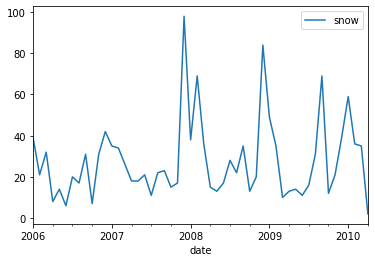

In [179]:
# check how snow is distributed over the data-set
# maybe we can already see an appropriate split
# snow is not uniformly distributed (as expected), however, stations seem to be really all over the world 
# due to a baseline of snow over the year
features_df[['date','snow']].set_index('date').resample('m').sum().plot()

In [180]:
# readd year + month to allow for filtering later on
features_df['year'] = pd.DatetimeIndex(features_df['date']).year
features_df['month'] = pd.DatetimeIndex(features_df['date']).month

In [181]:
## one hot encoder for stations
from sklearn.preprocessing import OneHotEncoder
one_hot_station_encoder = OneHotEncoder()
one_hot_station_encoder.fit(filtered_data_by_station_number['station_number'].to_numpy().reshape(-1, 1))

OneHotEncoder()

In [188]:
def station_number_to_one_hot_vec(df):
    station_numbers_vec = df['station_number'].to_numpy().reshape(-1, 1)
    return one_hot_station_encoder.transform(station_numbers_vec).toarray()

def remove_non_feature_columns(df):
    #return df.drop(columns=['year', 'month', 'date', 'station_number', 'snow'])
    return df.drop(columns=['year', 'date', 'station_number', 'snow'])

In [190]:
## fit standardscaler for later
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(remove_non_feature_columns(features_df).to_numpy())

StandardScaler()

In [191]:
remove_non_feature_columns(features_df).to_numpy().shape

(15562, 9)

In [192]:
from sklearn.model_selection import train_test_split
import numpy as np

# fist, split the data at random to quickly check linear classifier (as baseline)
def split_data_randomly(df):
    targets = df['snow'].to_numpy()
    feature_df = remove_non_feature_columns(df)
    
    station_vec = station_number_to_one_hot_vec(df)
    feature_matrix = np.hstack((scaler.transform(feature_df.to_numpy()), station_vec))
    
    return train_test_split(feature_matrix, targets, test_size=0.15)
random_training_data, random_val_data, random_training_targets, random_val_targets = split_data_randomly(features_df)

In [193]:
features_df.dtypes

date                        datetime64[ns]
station_number                       int64
mean_temp                          float64
mean_dew_point                     float64
mean_sealevel_pressure             float64
mean_visibility                    float64
mean_wind_speed                    float64
max_sustained_wind_speed           float64
max_temperature                    float64
total_precipitation                float64
snow                                 int64
year                                 int64
month                                int64
dtype: object

In [196]:
def df_to_feature_matrix(df):
    station_numbers_vec = df['station_number'].to_numpy().reshape(-1, 1)
    
    feature_df = remove_non_feature_columns(df)

    ## to numpy and normalize
    feature_matrix = scaler.transform(feature_df.to_numpy())
    
    # encode stations to one-hot and add 
    encoded_station_number = station_number_to_one_hot_vec(df)
    return np.hstack((feature_matrix, encoded_station_number))
    

# for each month of each year, group the data by station and do the following
# take time_stamps_amount of rows as window for data of each station, the row after the time_stamps_amount'th
# row represents the target
# the stride determines how to shift the window over the station data
# val_sample determines which sample should be part of the validation set
# to allow prediction of snow 12 years ago, use the complete year 2010 as test-data with stride = 1
def split_data_in_time_series(data, time_stamps_amount, train_stride, val_sample):
    train_samples = []
    train_targets = []
    
    val_samples = []
    val_targets = []
    
    test_samples = []
    test_targets = []
    
    month_year_groups = features_df.groupby(['month','year']).size().reset_index().rename(columns={0:'count'}).sort_values(by="year")
    
    for index, row in month_year_groups.iterrows():
        year = row['year']
        month = row['month']
        
        month_data = features_df[(features_df['year'] == year) & (features_df['month'] == month)]
        
        stations = month_data['station_number'].unique()
        
        for station in stations:
            
            station_data = month_data[month_data['station_number'] == station]
            
            total_amount_of_timestamps = station_data.shape[0]
            
            iteration_counter = 0
            row_counter = 0
            
            while (row_counter + time_stamps_amount + 1) <= total_amount_of_timestamps:
                time_stamps_range = np.arange(row_counter, row_counter + time_stamps_amount, 1)
                
                feature_matrix = df_to_feature_matrix(station_data.iloc[time_stamps_range])
                target = (station_data.iloc[row_counter + time_stamps_amount])['snow']
                
                if year == 2010:
                    test_samples.append(feature_matrix)
                    test_targets.append(target)
                    
                    # stride = 1
                    row_counter = row_counter + 1
                elif ((iteration_counter + 1) % val_sample) == 0:
                    val_samples.append(feature_matrix)
                    val_targets.append(target)
                    
                    # stride = time_stamps_amount, train and val set should not overlap
                    row_counter = row_counter + time_stamps_amount
                else:
                    train_samples.append(feature_matrix)
                    train_targets.append(target)
                    
                    # stride = train_stride
                    row_counter = row_counter + train_stride
                    
                iteration_counter = iteration_counter + 1
    
    return np.stack(train_samples), np.stack(train_targets), np.stack(val_samples), np.stack(val_targets), np.stack(test_samples), np.stack(test_targets) 
    

In [197]:
time_stamp_amount = 8
stride = 1
val_sample = 7

time_series_training_data, time_series_training_targets, time_series_val_data, time_series_val_targets, time_series_test_data, time_series_test_targets  = split_data_in_time_series(features_df, time_stamp_amount, stride, val_sample)

print(time_series_training_data.shape)
print(time_series_training_targets.shape)
print(time_series_val_data.shape)
print(time_series_val_targets.shape)
print(time_series_test_data.shape)
print(time_series_test_targets.shape)

(5728, 8, 19)
(5728,)
(907, 8, 19)
(907,)
(740, 8, 19)
(740,)


## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an Algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [198]:
import datetime, timedelta

day_to_predict = str(datetime.datetime.today()- datetime.timedelta(days=12*365)).split(' ')[0]
day_to_predict

'2010-02-04'

You are allowed to use any library you are comfortable with such as sklearn, tensorflow keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

In [127]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score

from sklearn import svm
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn import metrics

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D
from matplotlib import pyplot

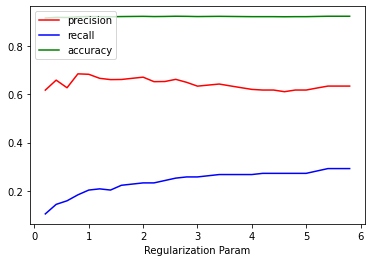

In [128]:
c_range = np.arange(0.2, 6, 0.2, dtype=float)
def plot_validation_curve_for_svm_reg_param(c_range):
    precisions = []
    recalls = []
    accuracies = []
    
    for c in c_range:
        model = svm.SVC(C=c)
        model.fit(random_training_data, random_training_targets)

        val_predicts = model.predict(random_val_data)
        
        support = precision_recall_fscore_support(random_val_targets, val_predicts, average="binary")
        precision = support[0]
        recall = support[1]
        
        precisions.append(precision)
        recalls.append(recall)
        
        accuracies.append(accuracy_score(random_val_targets, val_predicts))
       
    plt.plot(c_range, precisions, 'r', label="precision")
    plt.plot(c_range, recalls, 'b', label="recall")
    plt.plot(c_range, accuracies, 'g', label="accuracy") 
    plt.xlabel("Regularization Param")
    plt.legend(loc="upper left")
    plt.show()
    
plot_validation_curve_for_svm_reg_param(c_range)

In [199]:
from sklearn.utils import shuffle
time_series_training_data_shuffled, time_series_training_targets_shuffled = shuffle(time_series_training_data, time_series_training_targets, random_state=0)

In [200]:
time_series_training_data_shuffled.shape

(5728, 8, 19)

In [205]:
# define model
def define_lstm_model(feature_matrix):
    model = Sequential()
    model.add(LSTM(10, input_shape=(feature_matrix[0].shape[0], feature_matrix[0].shape[1])))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
    return model

In [206]:
lstm_model = define_lstm_model(time_series_training_data)

In [207]:
lstm_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 10)                1200      
                                                                 
 dense_20 (Dense)            (None, 5)                 55        
                                                                 
 dense_21 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,261
Trainable params: 1,261
Non-trainable params: 0
_________________________________________________________________


In [204]:
verbose, epochs, batch_size = 1, 60, 64

tb_callback = tf.keras.callbacks.TensorBoard('./logs', update_freq=1)
lstm_model.fit(time_series_training_data_shuffled, time_series_training_targets_shuffled, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(time_series_val_data, time_series_val_targets), callbacks=[tb_callback])

Epoch 1/60
90/90 [==============================] - 4s 11ms/step - loss: 0.5235 - precision_10: 0.1156 - recall_10: 0.2067 - val_loss: 0.3580 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 2/60
90/90 [==============================] - 0s 4ms/step - loss: 0.3094 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00 - val_loss: 0.2880 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 3/60
90/90 [==============================] - 0s 4ms/step - loss: 0.2902 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00 - val_loss: 0.2806 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 4/60
90/90 [==============================] - 0s 4ms/step - loss: 0.2860 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00 - val_loss: 0.2795 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 5/60
90/90 [==============================] - 0s 4ms/step - loss: 0.2836 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00 - val_loss: 0.2779 - val_precision_10: 0.0000

90/90 [==============================] - 0s 5ms/step - loss: 0.2610 - precision_10: 0.7097 - recall_10: 0.0410 - val_loss: 0.2764 - val_precision_10: 0.3333 - val_recall_10: 0.0244
Epoch 43/60
90/90 [==============================] - 0s 5ms/step - loss: 0.2608 - precision_10: 0.7353 - recall_10: 0.0466 - val_loss: 0.2785 - val_precision_10: 0.3333 - val_recall_10: 0.0244
Epoch 44/60
90/90 [==============================] - 0s 5ms/step - loss: 0.2596 - precision_10: 0.7209 - recall_10: 0.0577 - val_loss: 0.2769 - val_precision_10: 0.3333 - val_recall_10: 0.0244
Epoch 45/60
90/90 [==============================] - 0s 4ms/step - loss: 0.2596 - precision_10: 0.7568 - recall_10: 0.0521 - val_loss: 0.2783 - val_precision_10: 0.3333 - val_recall_10: 0.0244
Epoch 46/60
90/90 [==============================] - 0s 5ms/step - loss: 0.2590 - precision_10: 0.7021 - recall_10: 0.0615 - val_loss: 0.2799 - val_precision_10: 0.3333 - val_recall_10: 0.0244
Epoch 47/60
90/90 [============================

In [154]:
result = lstm_model.evaluate(time_series_val_data, time_series_val_targets, batch_size=batch_size, verbose=0)
print(f"precision: {result[1]}")
print(f"recall: {result[2]}")

precision: 0.18965516984462738
recall: 0.13414634764194489


In [155]:
result = lstm_model.evaluate(time_series_test_data, time_series_test_targets, batch_size=batch_size, verbose=0)
print(f"precision: {result[1]}")
print(f"recall: {result[2]}")

precision: 0.08620689809322357
recall: 0.1041666641831398


In [138]:
day_to_predict

'2010-02-04'

In [107]:
features_df[features_df['date'] == day_to_predict]

,date,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_temperature,total_precipitation,snow,year,month
936,2010-02-04,725326,24.000000,20.700001,1016.982834,4.5,4.1,8.9,15.800000,0.0,0,2010,2
1437,2010-02-04,725317,29.400000,23.700001,1026.699951,5.5,6.3,9.9,23.000000,0.0,0,2010,2
1941,2010-02-04,725300,27.900000,21.299999,1028.400024,6.0,3.9,8.9,21.200001,0.0,0,2010,2
2751,2010-02-04,725327,27.700001,21.900000,1028.900024,6.8,3.4,8.0,21.200001,0.0,0,2010,2
3307,2010-02-04,725305,25.600000,20.900000,1028.099976,4.1,3.4,8.0,16.000000,0.0,0,2010,2
3884,2010-02-04,725314,31.500000,24.400000,1025.500000,5.2,4.6,7.0,28.400000,0.0,0,2010,2
5655,2010-02-04,725330,30.700001,23.000000,1029.300049,8.2,3.3,8.0,24.799999,0.0,0,2010,2
8603,2010-02-04,725320,27.799999,21.600000,1027.599976,4.4,4.4,8.9,24.799999,0.0,0,2010,2
8818,2010-02-04,725316,28.400000,23.700001,1027.099976,4.6,7.5,13.0,21.200001,0.0,0,2010,2
10253,2010-02-04,725315,26.799999,22.000000,1027.500000,4.1,6.3,9.9,19.400000,0.0,0,2010,2


In [142]:
def tt_prediction(model, data, day_to_predict, time_stamp_amount):
    OKGREEN = '\033[92m'
    FAIL = '\033[91m'
    
    test_targets = []
    test_samples = []
    
    day_to_predict_data = data[data['date'] == day_to_predict]
    
    stations = day_to_predict_data['station_number'].unique()
    for station in stations:
        station_data = data[data['station_number'] == station]
        
        predecessors_df = station_data[station_data['date'] < day_to_predict].tail(time_stamp_amount)
        
        feature_matrix = df_to_feature_matrix(predecessors_df)
        target = day_to_predict_data['snow'].to_numpy()
        
        test_samples.append(feature_matrix)
        test_targets.append(target)
        
    test_samples = np.stack(test_samples)
    test_targets = np.stack(test_targets)
    
    prediction = lstm_model.predict(test_samples)
    
    for index, station in enumerate(stations):
        print(prediction[index][0])
        predicted_class = np.round(prediction[index][0])
        if predicted_class == target[index]:   
            print(f"{OKGREEN}Prediction for station {station}: correct - predicted:{predicted_class} == target:{target[index]} {OKGREEN}")
        else:
            print(f"{FAIL}Prediction for station {station}: incorrect - : prediction:{predicted_class} != target:{target[index]} {FAIL}")
    
    

In [143]:
tt_prediction(lstm_model, features_df, day_to_predict, time_stamp_amount)

9.492759e-13
Prediction for station 725326: correct - predicted:0.0 == target:0 
0.0018622279
Prediction for station 725317: correct - predicted:0.0 == target:0 
0.078636825
Prediction for station 725300: correct - predicted:0.0 == target:0 
0.010457873
Prediction for station 725327: correct - predicted:0.0 == target:0 
0.14287916
Prediction for station 725305: correct - predicted:0.0 == target:0 
0.43131572
Prediction for station 725314: correct - predicted:0.0 == target:0 
2.260974e-06
Prediction for station 725330: correct - predicted:0.0 == target:0 
0.0019866228
Prediction for station 725320: correct - predicted:0.0 == target:0 
6.167945e-09
Prediction for station 725316: correct - predicted:0.0 == target:0 
5.538032e-06
Prediction for station 725315: correct - predicted:0.0 == target:0 
